In [1]:
%matplotlib inline

import sys
sys.path.append('../')

import bisect
from collections import defaultdict
import datetime
import MySQLdb

from webhealth.analysis import AnalysisHelper

db_name='webhealth'
username='root'
password=''

db = MySQLdb.connect(host='localhost',
                         user=username,
                         passwd=password,
                         db=db_name)

ah = AnalysisHelper(username, password, db_name)

In [2]:
node_ids = ah.get_node_ids()
print "Node ids: {}".format(node_ids)

# I know that there are two nodes so far
failed_websites_0 = ah.get_failures(node_ids[0])
print "Number of failed websites {}: {}".format(node_ids[0], len(failed_websites_0))
failed_websites_1 = ah.get_failures(node_ids[1])
print "Number of failed websites {}: {}".format(node_ids[1], len(failed_websites_1))

failed = ah.find_failure_intersection(failed_websites_0, failed_websites_1, threshold_sec=60, threshold_occ=10)
len(failed)

Node ids: ['8b18188b10a7', 'aa4f2d96e411']
Number of failed websites 8b18188b10a7: 296
Number of failed websites aa4f2d96e411: 258


107

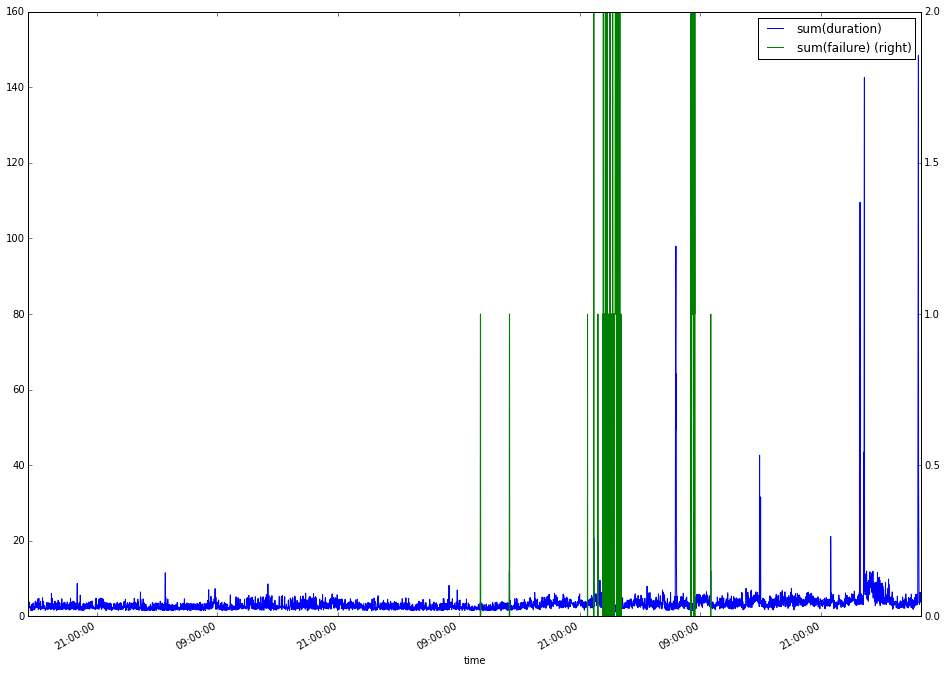

In [2]:
ah.plot_duration_and_success('yogajournal.com')

In [3]:
import pandas as pd

%matplotlib inline

def plot_value(query, column_name='value', *query_args):
    c = db.cursor()
    c.execute(query, query_args)
    value_res = []
    end_time_res = []
    
    for _ in range(c.rowcount):
        value, end_time = c.fetchone()

        value_res.append(float(value))
        end_time_res.append(end_time)
    c.close()

    df = pd.DataFrame({
            column_name: value_res,
            'time': end_time_res
        })
    return df.plot(x='time', figsize=(16, 12))


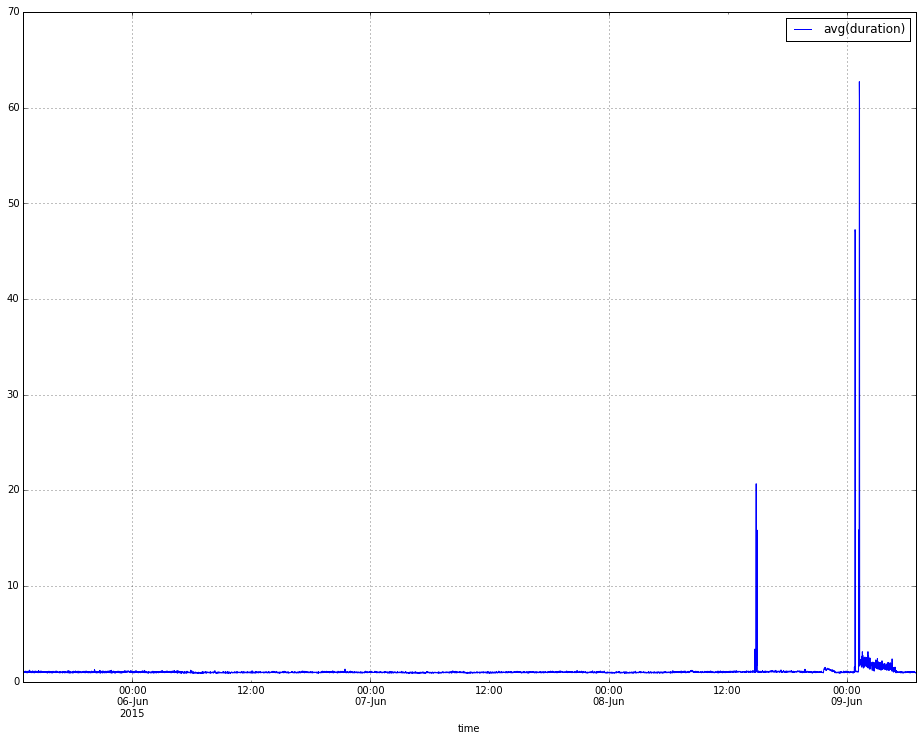

In [5]:
%matplotlib inline

plot_value('select avg(duration), end_time_n from metrics_upd where node_id=%s group by end_time_n',
           'avg(duration)', '8b18188b10a7')

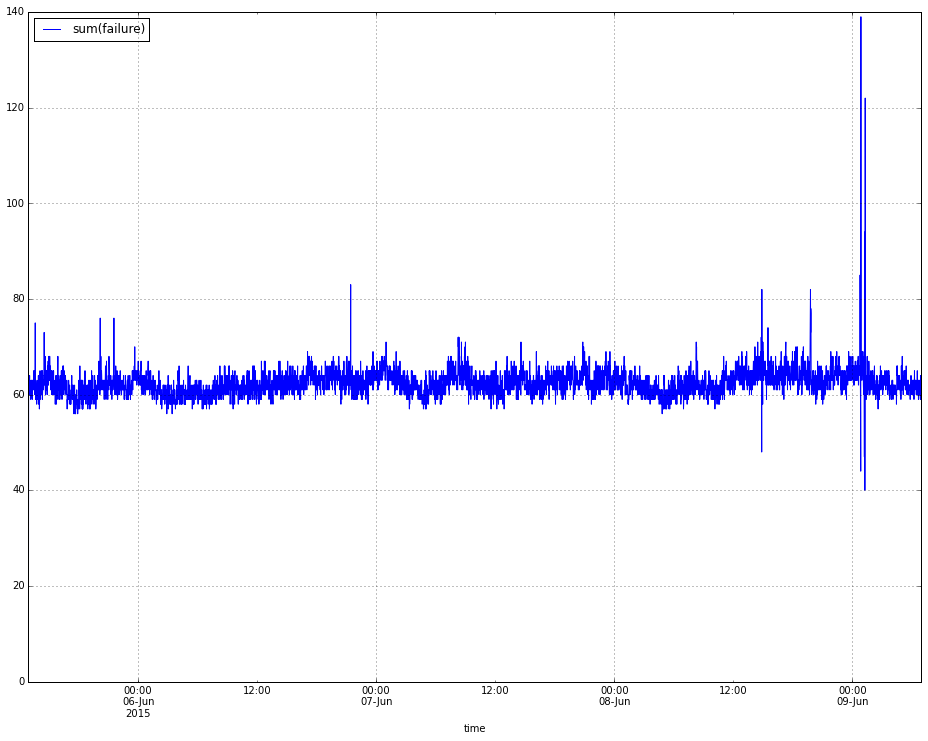

In [6]:
%matplotlib inline

plot_value('select sum(failure), end_time_n from metrics_upd where node_id=%s group by end_time_n',
           'sum(failure)', '8b18188b10a7')

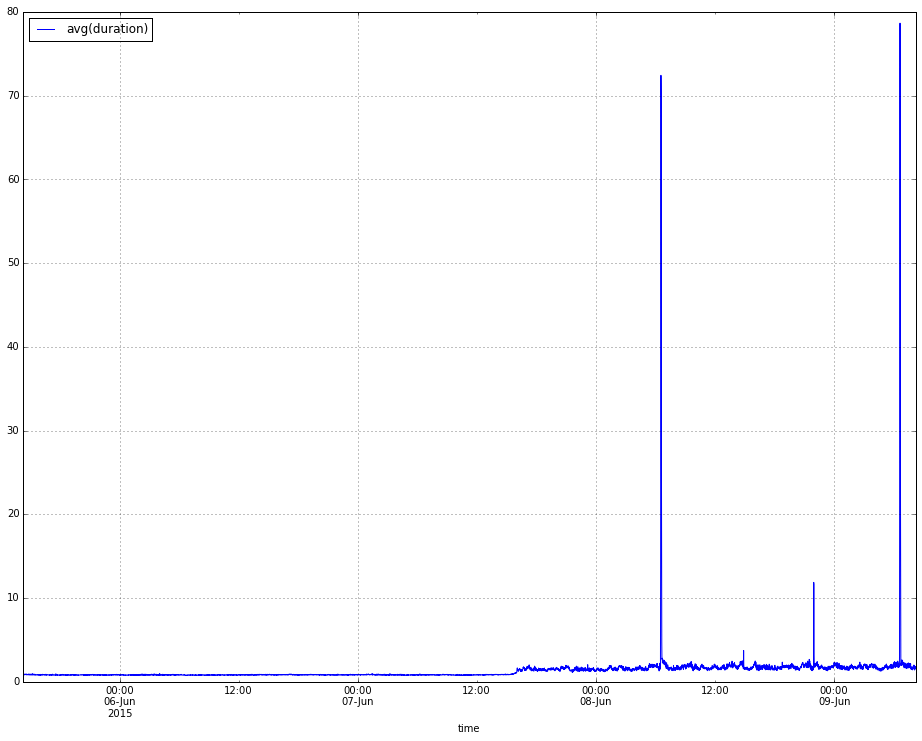

In [7]:
%matplotlib inline

plot_value('select avg(duration), end_time_n from metrics_upd where node_id=%s group by end_time_n',
           'avg(duration)',
           'aa4f2d96e411')

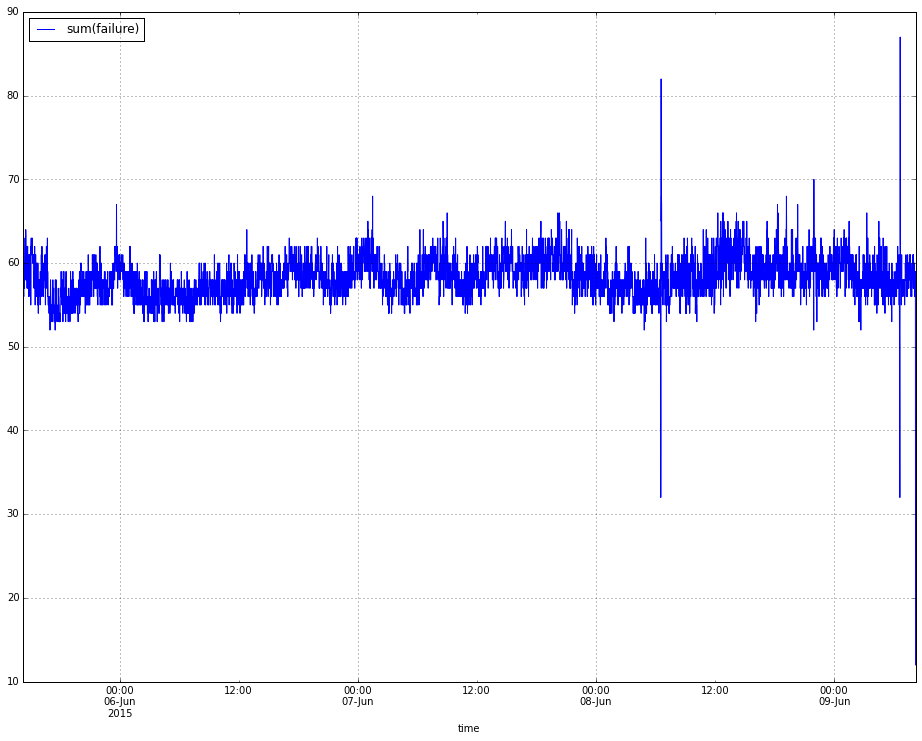

In [8]:
%matplotlib inline

plot_value('select sum(failure), end_time_n from metrics_upd where node_id=%s group by end_time_n',
           'sum(failure)',
           'aa4f2d96e411')

In [9]:
failed.join(',')

NameError: name 'failed' is not defined

In [12]:
failed

{'27.cn',
 'abchomeopathy.com',
 'abigailkirsch.com',
 'akwholesale.com',
 'allstate.com',
 'alternativa-za-vas.com',
 'amtamassage.org',
 'anthem.com',
 'aramark.cz',
 'arwholesale.co.uk',
 'assurant.com',
 'audit-it.ru',
 'autodoc.ru',
 'av.by',
 'aviva.co.uk',
 'avtobazar.ua',
 'bancodevenezuela.com',
 'bangkokbank.com',
 'billboard.com',
 'birchbox.fr',
 'blackweightlosssuccess.com',
 'bna.com',
 'bnfusa.com',
 'boohee.com',
 'bookclub.ua',
 'businessreferralgroup.org',
 'chouftv.ma',
 'ciashop.com.br',
 'closeoutservices.com',
 'coachfederation.org',
 'diets.ru',
 'dzo-marketing.de',
 'efile.com',
 'equinox.com',
 'extrastores.com',
 'fashiongonerogue.com',
 'fashiony.ru',
 'fitnessworld.dk',
 'focacciacatering.com',
 'fragrantica.ru',
 'ganool.com',
 'gesuender-abnehmen.com',
 'globalsources.com',
 'goldsgym.com',
 'gotprint.net',
 'gwrs.com',
 'hpathy.com',
 'i-fit.com.tw',
 'icai.org',
 'iluria.com',
 'indiegogo.com',
 'indigo.ca',
 'italia-film.org',
 'jobber1wholesale.com',
 

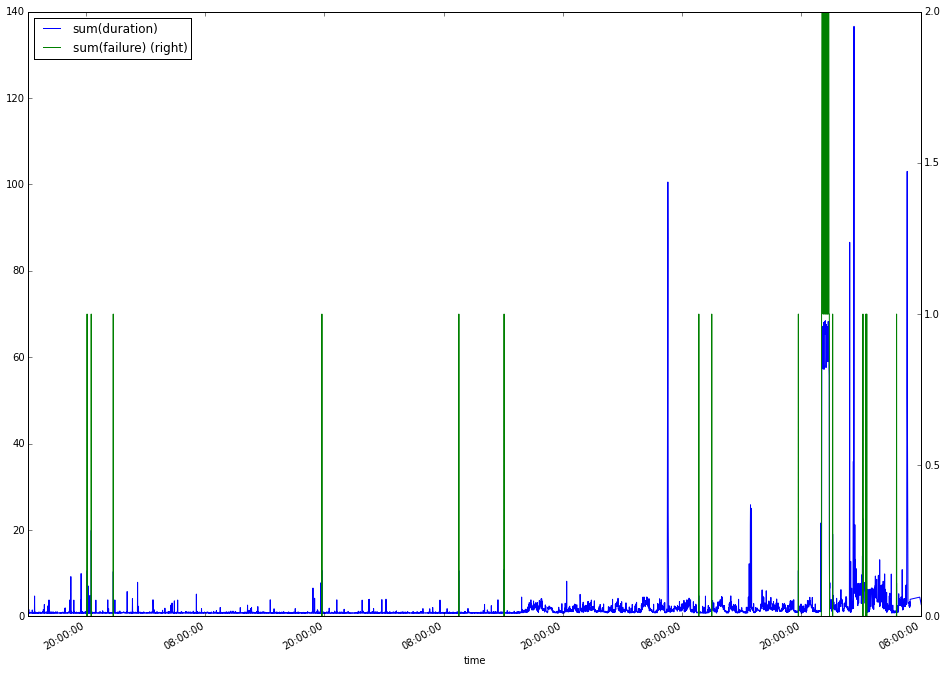

In [4]:
ah.plot_duration_and_success('yves-rocher.com')

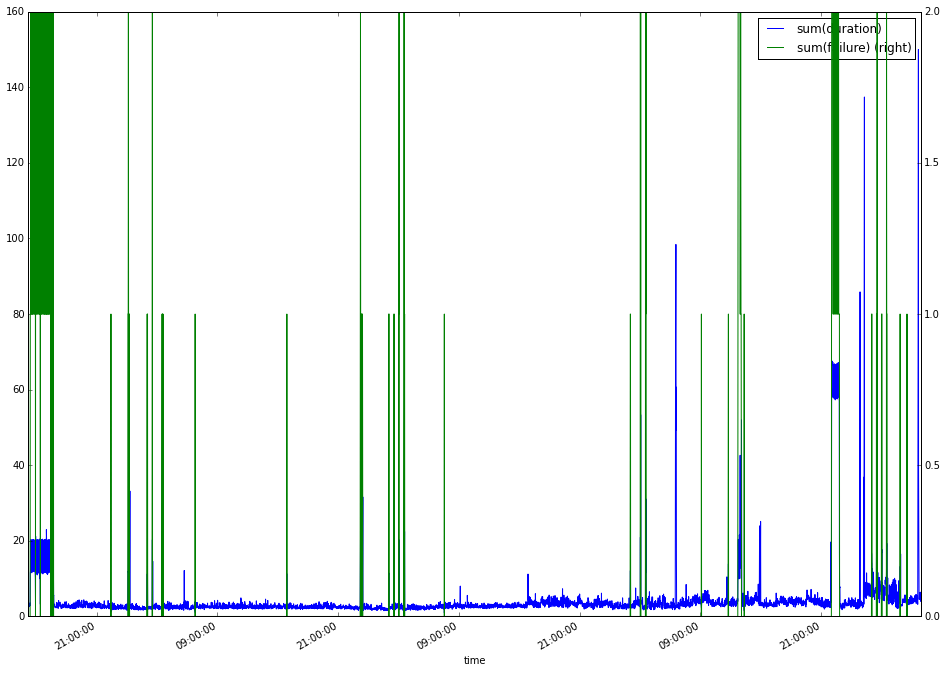

In [5]:
ah.plot_duration_and_success('yves-rocher.fr')

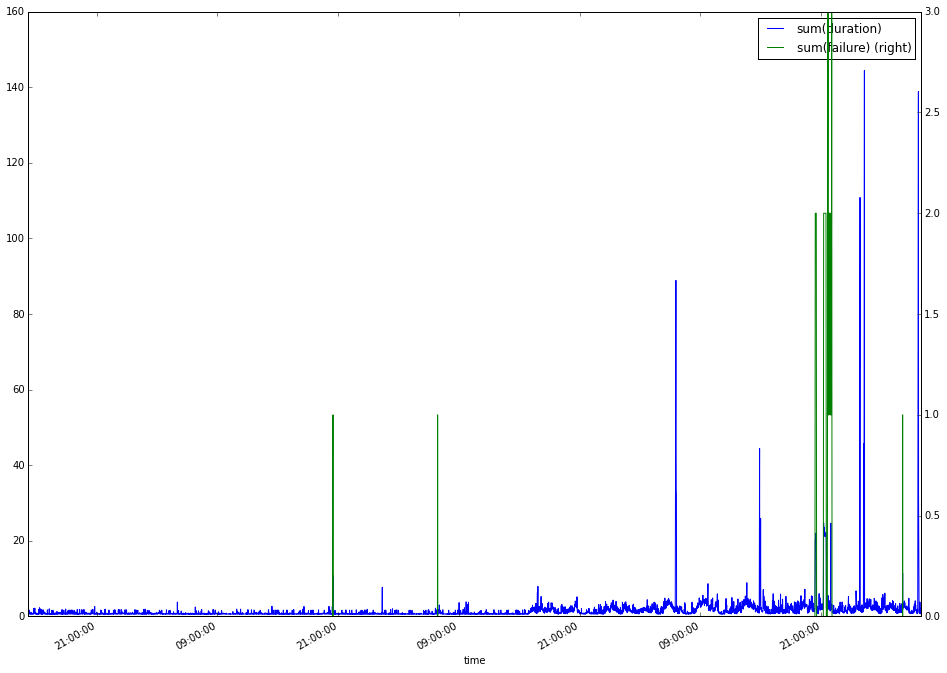

In [8]:
ah.plot_duration_and_success('smashbox.com')